In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Context

Импорт данных из файла и вывод первых и последних записей.

In [2]:
# запись содержимого файла в датафрейм
pass_data = pd.read_csv("train.csv", index_col='PassengerId') 
pass_data.head(10) #вывод первых 10 строк

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


In [3]:
pass_data.tail(10) #вывод последних 10 строк

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
99990,1,3,"King, Nancy",female,15.0,0,0,A.5. 356933,10.92,NaN,S
99991,0,1,"Hogan, Todd",male,53.0,0,5,CA 48075,30.09,B19289,Q
99992,1,2,"Cordero, Rita",female,58.0,0,0,4451636,30.53,F12072,C
99993,1,3,"Register, Naomi",female,17.0,0,0,20029,4.06,NaN,S
99994,0,2,"Stevens, Clinton",male,36.0,0,0,41343,12.14,NaN,S
99995,1,2,"Bell, Adele",female,62.0,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.0,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.0,0,0,NaN,9.95,NaN,S
99998,0,3,"Caughlin, Thomas",male,51.0,0,1,458654,30.92,NaN,S


Согласно описанию в kaggle датасет синтетически сгенерирован на основе реальных данных о пассажирах "Титаника". Кроме уникального индекса пассажира таблице 11 столбцов:
- Survived - выжил пассажир(1) или погиб (0) 
- Pclass - класс (1 - первый, 2 - второй, 3 - третий)
- Name - имя пассажира
- Sex - пол пассажира
- Age - возраст пассажира
- SibSp - количество братев/сестер+супругов, путешествовавших с пассажиром
- Parch - количество родителей/детей, путешествовавших с пассажиром
- Ticket - номер билета
- Fare - стоимость билета
- Cabin - номер каюты
- Embarked - порт посадки (S - Саутгемптон, C - Шербур, Q - Куинстаун)

В соревновании на Kaggle нужно определить выживших и погибших пассажиров, следовательно необходимо проверить, как остальные факторы влияют на выживаемость.

# Data quality assessment

In [4]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [5]:
# check for NAs
pass_data.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

Пропущены данные по столбцам Age - 3,29%, Ticket - 4,62%, Fare - 0,13%, Cabin - 67,87%, Embarked - 0,25 %.В
Вместо пропущенных данных будет выполнена подстановка:
- Embarked - наиболее часто встречающееся значение
- Age - медиана в зависимости от пола и класса
- Fare - медиана в зависимости от класса

В большей части записей отстутствует информация о каютах. Есть предположение что наличие/отсутствие данных может говорить о выживаемости (погибшие не могли дополнить информацию о себе после катастрофы). Поэтому добавлю в датасет дополнительный столбец MissCabin, отражающий отсутствие(True)/(False) наличие информации о каютах. Сам столбец Cabin в анализе использоваться не будет.
Также не будет анализироваться столбец Ticket.  

In [6]:
pass_data.Embarked.fillna(pass_data.Embarked.mode()[0], inplace = True) #

In [7]:
SP = pass_data.groupby(["Sex","Pclass"])
pass_data["Age"] = pass_data["Age"].fillna(SP["Age"].transform("median"))

In [9]:
P = pass_data.groupby(["Pclass"])
pass_data["Fare"] = pass_data["Fare"].fillna(P["Fare"].transform("median"))

In [10]:
pass_data['MissCabin']=pass_data.Cabin.isnull()
pass_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MissCabin
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,44.00,2,0,209245,27.14,C12239,S,False
1,0,3,"Bryan, Drew",male,31.00,0,0,27323,13.35,NaN,S,True
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,True
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,True
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,True


Проверка на наличие дубликатов.

In [11]:
fullDduplicateRows = pass_data[pass_data.duplicated(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])]
fullDduplicateRows

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MissCabin
PassengerId,,,,,,,,,,,,


Полные дубликаты отсутствуют. Есть дубликаты,отличающиеся только номером и ценой билета, номер каюты у всех таких дубликатов отсутствует. Теоретически наличие таких пассажиров возможно, хоть и маловероятно.

In [12]:
pass_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.427740,2.106910,38.322220,0.397690,0.454560,43.911139
std,0.494753,0.837727,18.056228,0.862566,0.950076,69.548710
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.040000
50%,0.000000,2.000000,38.000000,0.000000,0.000000,24.450000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.500000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000


Максимальное значение в колонке Fare значительно отличается от третьего квартиля. Хотя максимальная стоимость билета 744,6 скорее всего, не является ошибкой (максимальная стоимость билета первого класса на реальном Титанике составляла  £870 фунтов), такое отклонение может искажать результаты и следует исследовать выбросы в Fare.

<AxesSubplot:xlabel='Fare'>

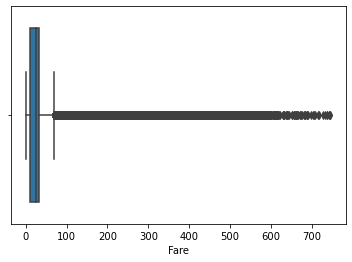

In [13]:
sns.boxplot(x=pass_data["Fare"])

Больше похоже на то, что высокие значения являются частью распределения, а не выбросами.

# Data exploration

Выживаемость: 42.77%


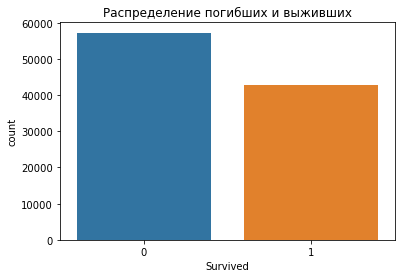

In [14]:
sns.countplot(x='Survived', data=pass_data).set(title='Распределение погибших и выживших')
print("Выживаемость: "+ "{:.2%}".format(pass_data.Survived.sum()/pass_data.Survived.count()))

% женщин: 43.89%
% мужчин: 56.11%


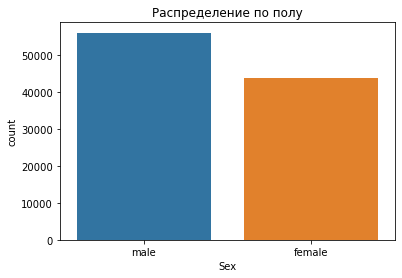

In [15]:
sns.countplot(x='Sex', data=pass_data).set(title='Распределение по полу')
print("% женщин: "+ "{:.2%}".format(pass_data[pass_data.Sex == 'female'].Sex.count()/pass_data.Sex.count()))
print("% мужчин: "+ "{:.2%}".format(pass_data[pass_data.Sex == 'male'].Sex.count()/pass_data.Sex.count()))

Выживаемость среди женщин: 0.7115253155903933
Выживаемость среди мужчин: 0.20579534519014864


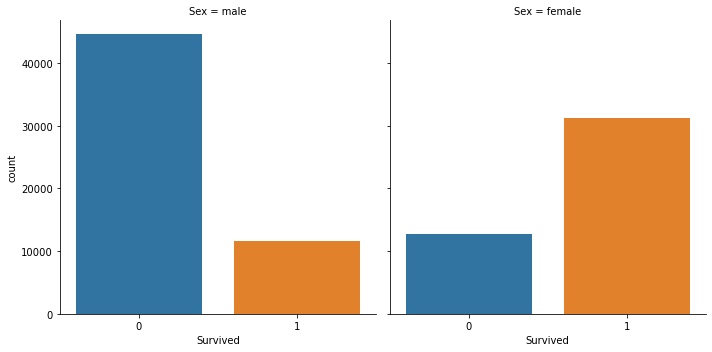

In [16]:
sns.catplot(x='Survived', col='Sex', kind='count', data=pass_data)#График выживаемости в зависимости от пола
print("Выживаемость среди женщин: "+ str(pass_data[pass_data.Sex == 'female'].Survived.sum()/pass_data[pass_data.Sex == 'female'].Survived.count()))
print("Выживаемость среди мужчин: "+ str(pass_data[pass_data.Sex == 'male'].Survived.sum()/pass_data[pass_data.Sex == 'male'].Survived.count()))

Пол является одним из основных факторов, влияющих на выживаемость. Процент выживших женщин почти в 3,5 раз превышает процент выживших мужчин.

1 класс: 30.31%
2 класс: 28.68%
3 класс: 41.01%


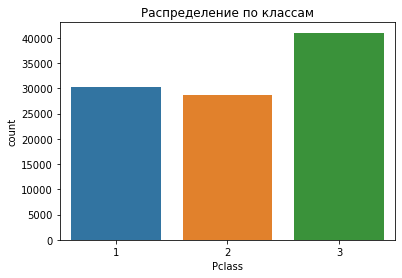

In [17]:
sns.countplot(x='Pclass', data=pass_data).set(title='Распределение по классам')
print("1 класс: "+ "{:.2%}".format(pass_data[pass_data.Pclass == 1].Pclass.count()/pass_data.Pclass.count()))
print("2 класс: "+ "{:.2%}".format(pass_data[pass_data.Pclass == 2].Pclass.count()/pass_data.Pclass.count()))
print("3 класс: "+ "{:.2%}".format(pass_data[pass_data.Pclass == 3].Pclass.count()/pass_data.Pclass.count()))

Выживаемость 1 класс: 0.5797789873000165
Выживаемость 2 класс: 0.5250183060776178
Выживаемость 3 класс: 0.24730527239916109


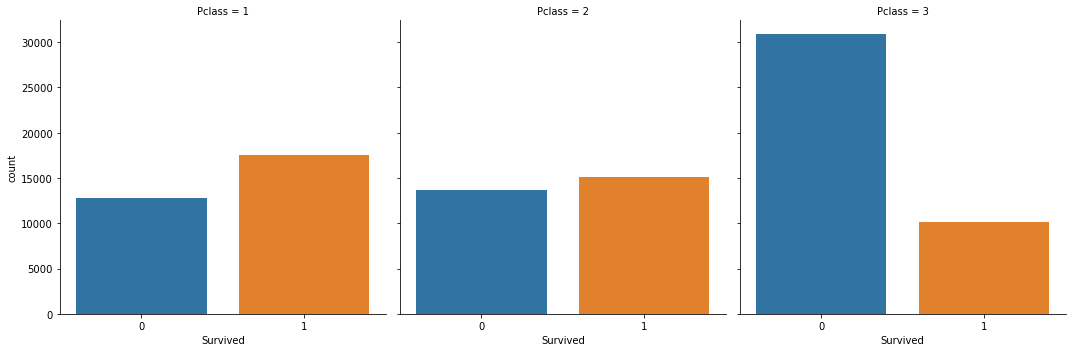

In [19]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=pass_data)
print("Выживаемость 1 класс: "+ str(pass_data[pass_data.Pclass == 1].Survived.sum()/pass_data[pass_data.Pclass == 1].Survived.count()))
print("Выживаемость 2 класс: "+ str(pass_data[pass_data.Pclass == 2].Survived.sum()/pass_data[pass_data.Pclass == 2].Survived.count()))
print("Выживаемость 3 класс: "+ str(pass_data[pass_data.Pclass == 3].Survived.sum()/pass_data[pass_data.Pclass == 3].Survived.count()))

Чем выше класс, тем выше шансы выжить.

Саутгемптон: 72.39%
Шербур: 22.19%
Куинстаун: 5.42%


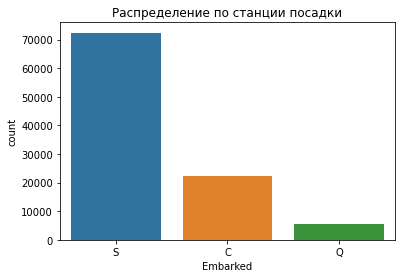

In [91]:
sns.countplot(x='Embarked', data=pass_data).set(title='Распределение по станции посадки')
print("Саутгемптон: "+ "{:.2%}".format(pass_data[pass_data.Embarked == "S"].Embarked.count()/pass_data.Embarked.count()))
print("Шербур: "+ "{:.2%}".format(pass_data[pass_data.Embarked == "C"].Embarked.count()/pass_data.Embarked.count()))
print("Куинстаун: "+ "{:.2%}".format(pass_data[pass_data.Embarked == "Q"].Embarked.count()/pass_data.Embarked.count()))

Выживаемость Саутгемптон: 0.31589053585489507
Выживаемость Шербур: 0.7512958038491008
Выживаемость Куинстаун: 0.596976401179941


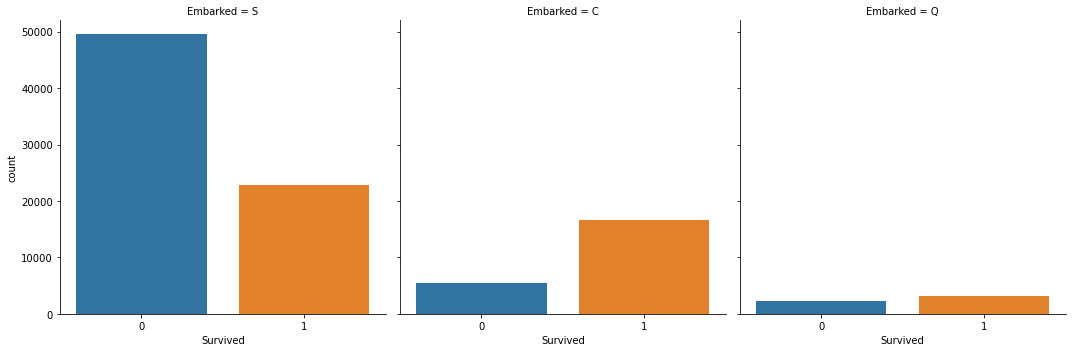

In [20]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=pass_data);
print("Выживаемость Саутгемптон: "+ str(pass_data[pass_data.Embarked == 'S'].Survived.sum()/pass_data[pass_data.Embarked == 'S'].Survived.count()))
print("Выживаемость Шербур: "+ str(pass_data[pass_data.Embarked == 'C'].Survived.sum()/pass_data[pass_data.Embarked == 'C'].Survived.count()))
print("Выживаемость Куинстаун: "+ str(pass_data[pass_data.Embarked == 'Q'].Survived.sum()/pass_data[pass_data.Embarked == 'Q'].Survived.count()))

По графикам прослеживается зависимость между портом посадки и выживаемостью. Это можно объяснить тем, что в Саутгемптоне село большее количество пассажиров с более дешевыми билетами 3 класса, чем в Шербуре и Квинстауне.

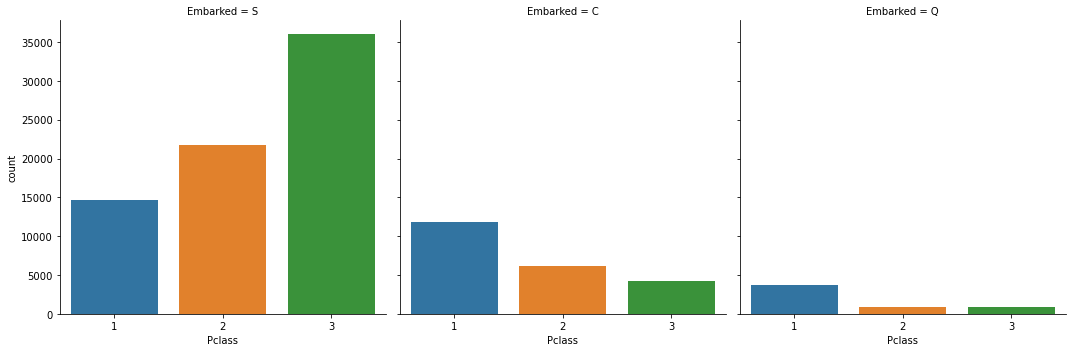

In [93]:
sns.catplot(x='Pclass', col='Embarked', kind='count', data=pass_data);

Выживаемость пассажиров с отсутстствующим номером каюты: 0.34210061002563874
Выживаемость пассажиров с присутствующим номером каюты: 0.6086077052343313


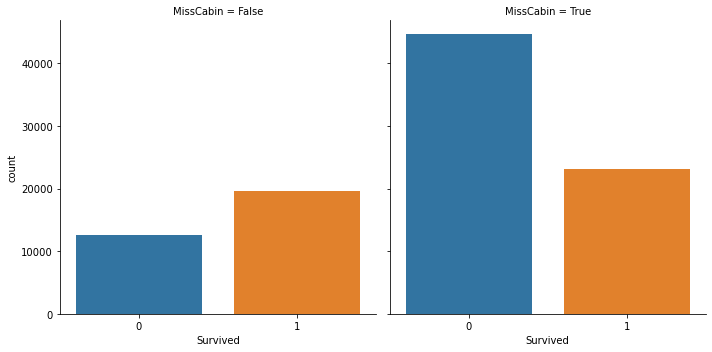

In [96]:
sns.catplot(x='Survived', col='MissCabin', kind='count', data=pass_data);
print("Выживаемость пассажиров с отсутстствующим номером каюты: "+ str(pass_data[pass_data.MissCabin == True].Survived.sum()/pass_data[pass_data.MissCabin == True].Survived.count()))
print("Выживаемость пассажиров с присутствующим номером каюты: "+ str(pass_data[pass_data.MissCabin == False].Survived.sum()/pass_data[pass_data.MissCabin == False].Survived.count()))

In [ ]:
Среди пассажиров с отстутсвующим номером каюты процент выживших меньше.

[Text(0.5, 1.0, 'Выживаемость в зависимости от SibSp)')]

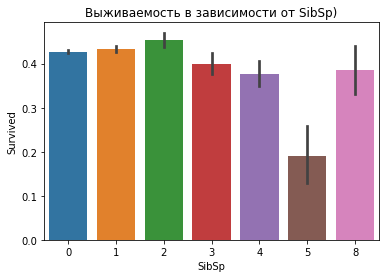

In [94]:
sns.barplot(x ='SibSp', y ='Survived', data = pass_data).set(title='Выживаемость в зависимости от SibSp)')

[Text(0.5, 1.0, 'Выживаемость в зависимости от Parch)')]

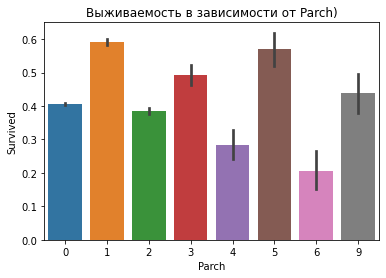

In [95]:
sns.barplot(x ='Parch', y ='Survived', data = pass_data).set(title='Выживаемость в зависимости от Parch')

[Text(0.5, 1.0, 'Выживаемость в зависимости от стоимости билета')]

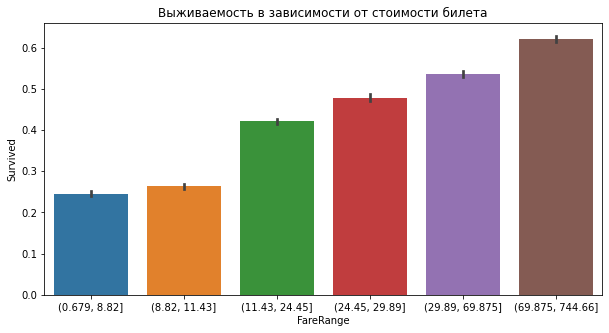

In [39]:

pass_data['FareRange'] = pd.qcut(pass_data['Fare'], 6)
plt.figure(figsize = (10,5))

sns.barplot(x ='FareRange', y ='Survived', data = pass_data).set(title='Выживаемость в зависимости от стоимости билета')

С увеличением стоимости билета процент выживаемости возрастает.

[Text(0.5, 1.0, 'Выживаемость в зависимости от возраста')]

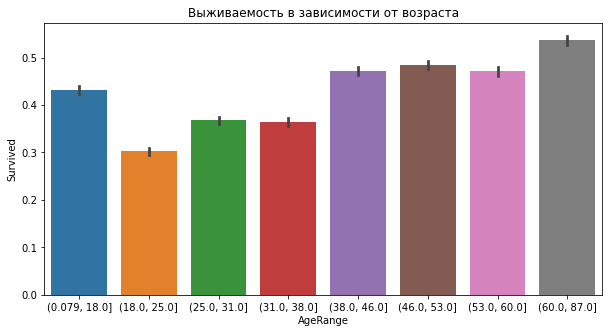

In [48]:
pass_data['AgeRange'] = pd.qcut(pass_data['Age'], 8)
plt.figure(figsize = (10,5))

sns.barplot(x ='AgeRange', y ='Survived',
data = pass_data).set(title='Выживаемость в зависимости от возраста')


Наименьшая вероятность выжить у пассажиров в возрасте 15-35 лет.

[Text(0.5, 1.0, 'Выживаемость в зависимости от возраста(женщины)')]

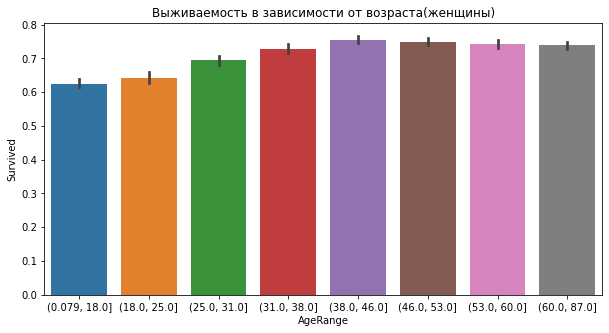

In [49]:

plt.figure(figsize = (10,5))

sns.barplot(x ='AgeRange', y ='Survived',
data = pass_data[pass_data['Sex']=="female"]).set(title='Выживаемость в зависимости от возраста(женщины)')

[Text(0.5, 1.0, 'Выживаемость в зависимости от возраста(мужчины)')]

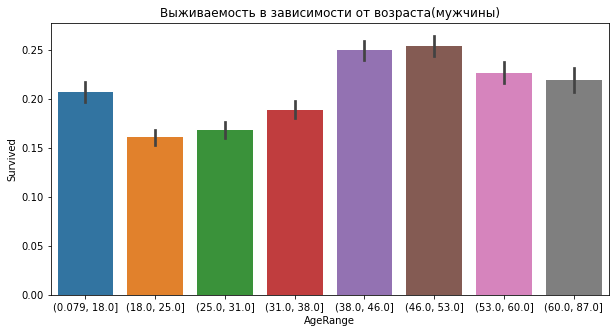

In [50]:
plt.figure(figsize = (10,5))
sns.barplot(x ='AgeRange', y ='Survived',
data = pass_data[pass_data['Sex']=="male"]).set(title='Выживаемость в зависимости от возраста(мужчины)')


# Summary